# <span style="font-size: 32px; font-weight: bold; color: #2c3e50;">Table of Contents</span>

---

1. **[Data Overview](#Data-Overview)**  
   - [Basic Information](#Basic-Information)  
   - [Statistical Summary](#Statistical-Summary)  
   - [Missing Values Check](#Missing-Values-Check)  
   - [Duplicate Rows Check](#Duplicate-Rows-Check)

2. **[Data Visualization](#Data-Visualization)**  
   - [Class Distribution (Pie Chart)](#Class-Distribution-Pie-Chart)  
   - [Distribution of Numerical Features](#Distribution-of-Numerical-Features)  
   - [Age vs Monthly Income (Scatter Plot)](#Age-vs-Monthly-Income-Scatter-Plot)  
   - [Attrition by Categorical Features](#Attrition-by-Categorical-Features)  
   - [Satisfaction Metrics vs Attrition](#Satisfaction-Metrics-vs-Attrition)  
   - [Education and Education Field vs Attrition](#Education-and-Education-Field-vs-Attrition)  
   - [Age Distribution vs Attrition](#Age-Distribution-vs-Attrition)  
   - [Gender vs Attrition](#Gender-vs-Attrition)

3. **[Data Preprocessing](#Data-Preprocessing)**  
   - [Handling Categorical Variables](#Handling-Categorical-Variables)  
   - [Encoding Categorical Variables](#Encoding-Categorical-Variables)  
   - [Handling Numerical Features](#Handling-Numerical-Features)  
   - [Normalization](#Normalization)  
   - [Oversampling](#Oversampling)

---

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer


In [93]:
df = pd.read_csv('Students_Grading_Dataset.csv')

df.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Student_ID,S1000,S1001,S1002,S1003,S1004,S1005,S1006,S1007,S1008,S1009,...,S5990,S5991,S5992,S5993,S5994,S5995,S5996,S5997,S5998,S5999
First_Name,Omar,Maria,Ahmed,Omar,John,Liam,Ahmed,Ahmed,Omar,Sara,...,Ali,John,Sara,Ali,John,Ahmed,Emma,John,Sara,Maria
Last_Name,Williams,Brown,Jones,Williams,Smith,Brown,Jones,Smith,Smith,Smith,...,Johnson,Williams,Johnson,Johnson,Johnson,Jones,Brown,Brown,Davis,Brown
Email,student0@university.com,student1@university.com,student2@university.com,student3@university.com,student4@university.com,student5@university.com,student6@university.com,student7@university.com,student8@university.com,student9@university.com,...,student4990@university.com,student4991@university.com,student4992@university.com,student4993@university.com,student4994@university.com,student4995@university.com,student4996@university.com,student4997@university.com,student4998@university.com,student4999@university.com
Gender,Female,Male,Male,Female,Female,Male,Male,Male,Female,Female,...,Male,Female,Male,Female,Female,Male,Male,Female,Male,Female
Age,22,18,24,24,23,21,24,19,21,22,...,24,20,18,22,19,19,19,24,23,21
Department,Engineering,Engineering,Business,Mathematics,CS,Engineering,Business,Engineering,CS,Engineering,...,CS,Engineering,CS,Business,Mathematics,Business,Business,CS,CS,Engineering
Attendance (%),52.29,97.27,57.19,95.15,54.18,NaN,57.6,51.91,85.97,64.01,...,80.53,55.54,NaN,99.21,NaN,NaN,65.11,87.54,92.56,83.92
Midterm_Score,55.03,97.23,67.05,47.79,46.59,78.85,66.26,45.67,84.42,87.96,...,87.83,59.68,61.44,60.16,69.92,82.15,86.31,63.55,79.79,83.24
Final_Score,57.82,45.8,93.68,80.63,78.89,43.53,89.07,73.96,90.87,98.47,...,43.7,63.09,64.59,59.18,55.48,60.33,49.8,64.21,94.28,53.47


## Data Overview

### Basic Information

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

### Statistical Summary

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.048400,1.989786,18.00,19.0000,21.000,23.0000,24.00
Attendance (%),4484.0,75.431409,14.372446,50.01,63.2650,75.725,87.4725,100.00
Midterm_Score,5000.0,70.326844,17.213209,40.00,55.4575,70.510,84.9700,99.98
Final_Score,5000.0,69.640788,17.238744,40.00,54.6675,69.735,84.5000,99.98
Assignments_Avg,4483.0,74.798673,14.411799,50.00,62.0900,74.810,86.9700,99.98
Quizzes_Avg,5000.0,74.910728,14.504281,50.03,62.4900,74.695,87.6300,99.96
Participation_Score,5000.0,4.980024,2.890136,0.00,2.4400,4.955,7.5000,10.00
Projects_Score,5000.0,74.924860,14.423415,50.01,62.3200,74.980,87.3675,100.00
Total_Score,5000.0,75.121804,14.399941,50.02,62.8350,75.395,87.6525,99.99
Study_Hours_per_Week,5000.0,17.658860,7.275864,5.00,11.4000,17.500,24.1000,30.00


In [32]:
df.describe(include='object').T

,count,unique,top,freq
Student_ID,5000,5000,S1000,1
First_Name,5000,8,Maria,657
Last_Name,5000,6,Johnson,868
Email,5000,5000,student0@university.com,1
Gender,5000,2,Male,2551
Department,5000,4,CS,2022
Grade,5000,5,A,1495
Extracurricular_Activities,5000,2,No,3493
Internet_Access_at_Home,5000,2,Yes,4485
Parent_Education_Level,3206,4,PhD,820


### Missing Values Check

In [33]:
df.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [34]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

Student_ID                     0.00
First_Name                     0.00
Last_Name                      0.00
Email                          0.00
Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        35.88
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64

### Duplicate Rows Check

In [35]:
df.duplicated().sum()

0

## Data Visualization

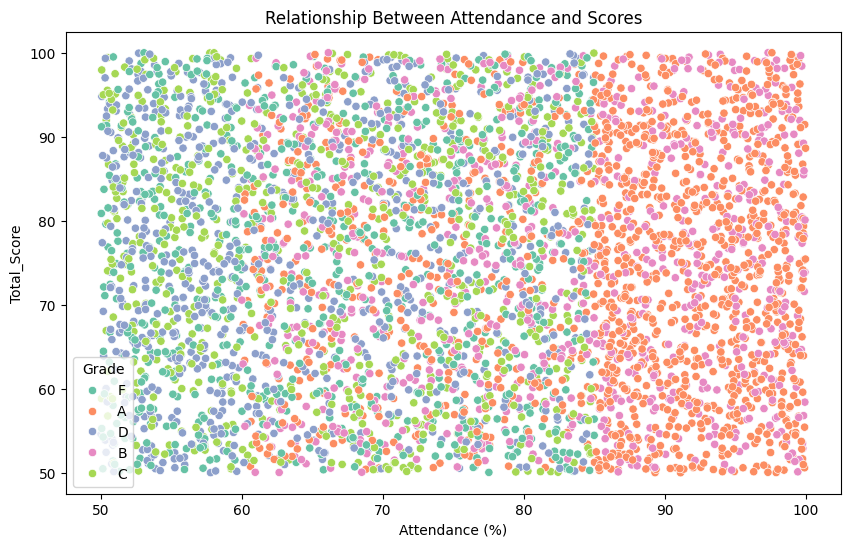

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Attendance (%)'], y=df['Total_Score'], hue=df['Grade'])
plt.title("Relationship Between Attendance and Scores")
plt.show()

### This means that students with higher attendance tend to have higher scores. 
### This is likely because students who attend lectures regularly are more likely to learn the material and do well on exams

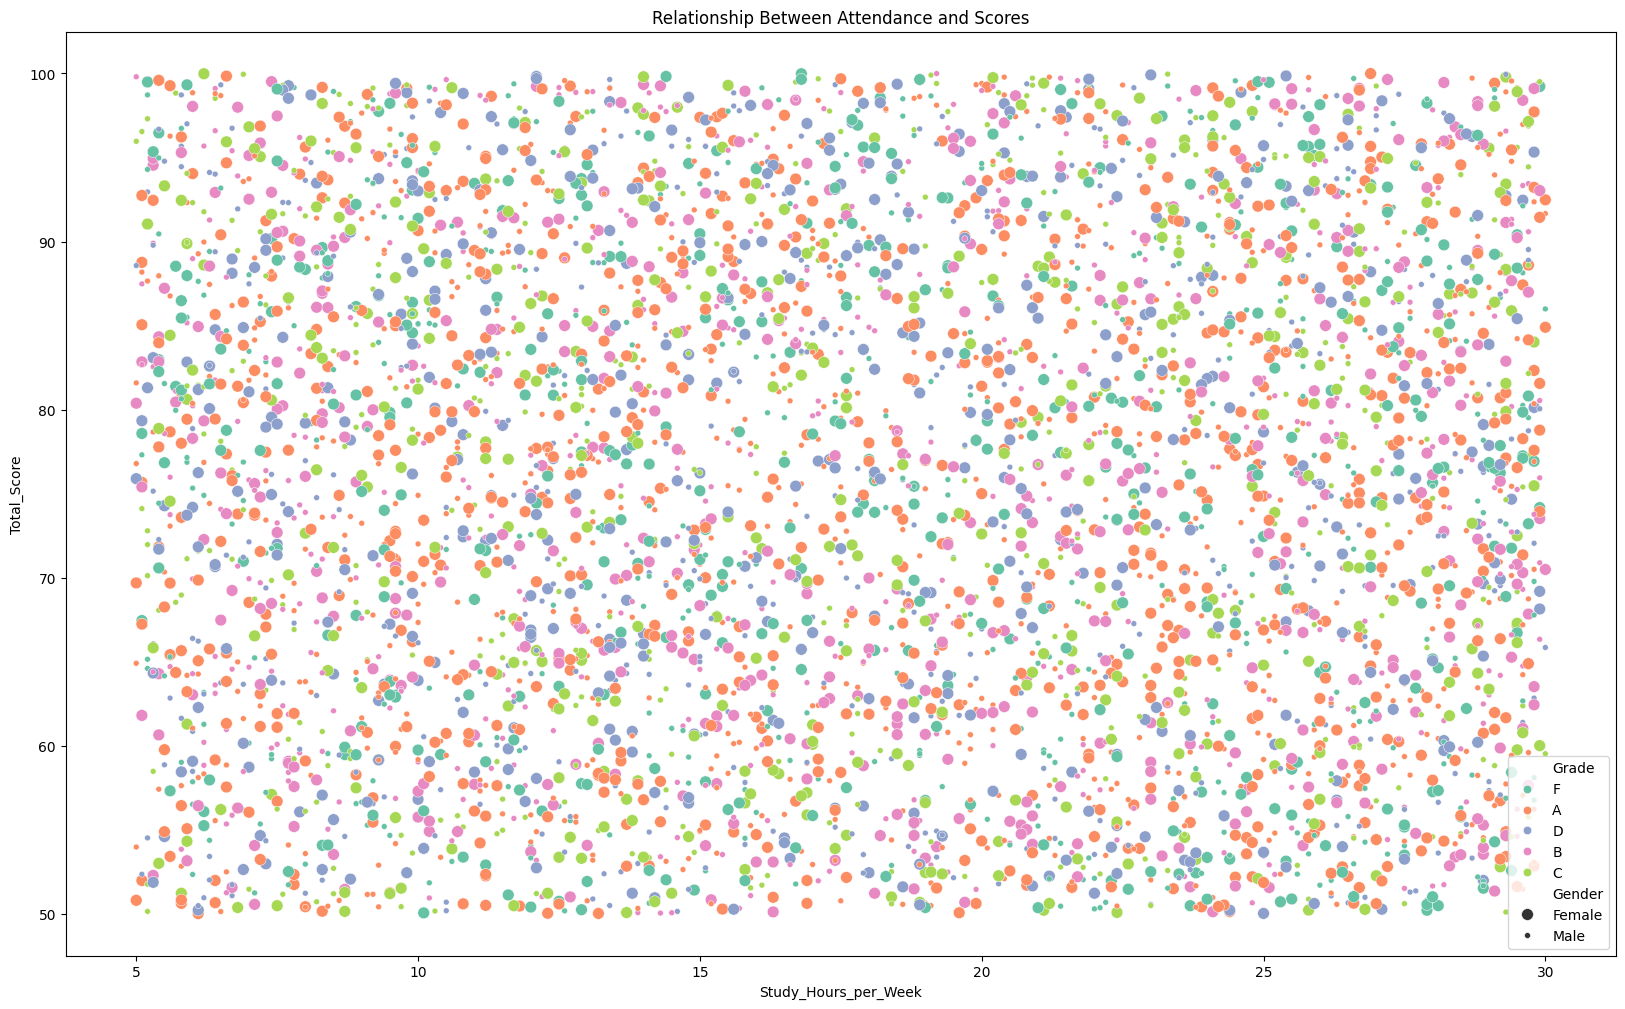

In [83]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x=df['Study_Hours_per_Week'], y=df['Total_Score'], hue=df['Grade'],size=df['Gender'])
plt.title("Relationship Between Attendance and Scores")
plt.show()

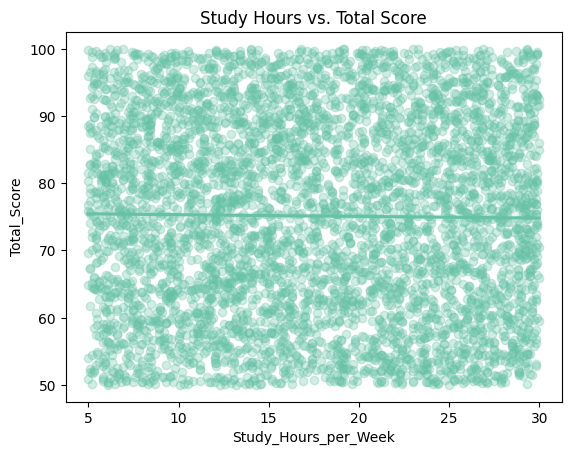

In [91]:
sns.regplot(x="Study_Hours_per_Week", y="Total_Score", data=df, scatter_kws={'alpha':0.3})
plt.title("Study Hours vs. Total Score")
plt.show()

<Axes: xlabel='Study_Hours_per_Week', ylabel='Grade'>

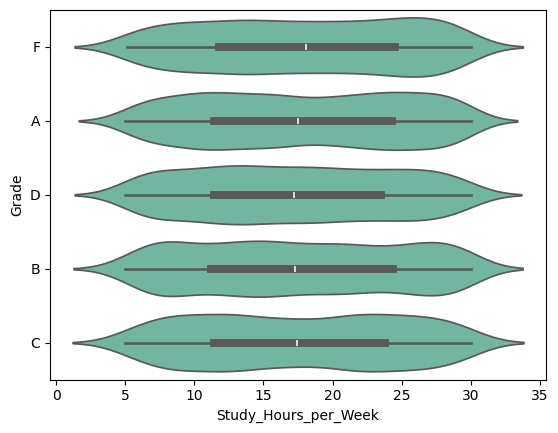

In [89]:
sns.violinplot(x="Study_Hours_per_Week", y="Grade", data=df)


<Axes: xlabel='Study_Hours_Bin', ylabel='Score_Bin'>

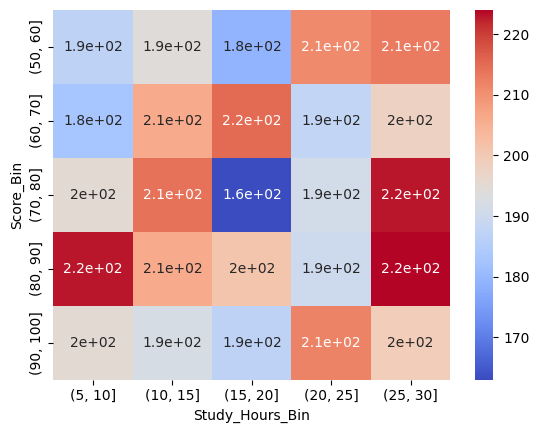

In [88]:

df["Study_Hours_Bin"] = pd.cut(df["Study_Hours_per_Week"], bins=np.arange(5, 35, 5))
df["Score_Bin"] = pd.cut(df["Total_Score"], bins=np.arange(50, 105, 10))

pivot = df.pivot_table(index="Score_Bin", columns="Study_Hours_Bin", aggfunc="size", fill_value=0)
sns.heatmap(pivot, cmap="coolwarm", annot=True)

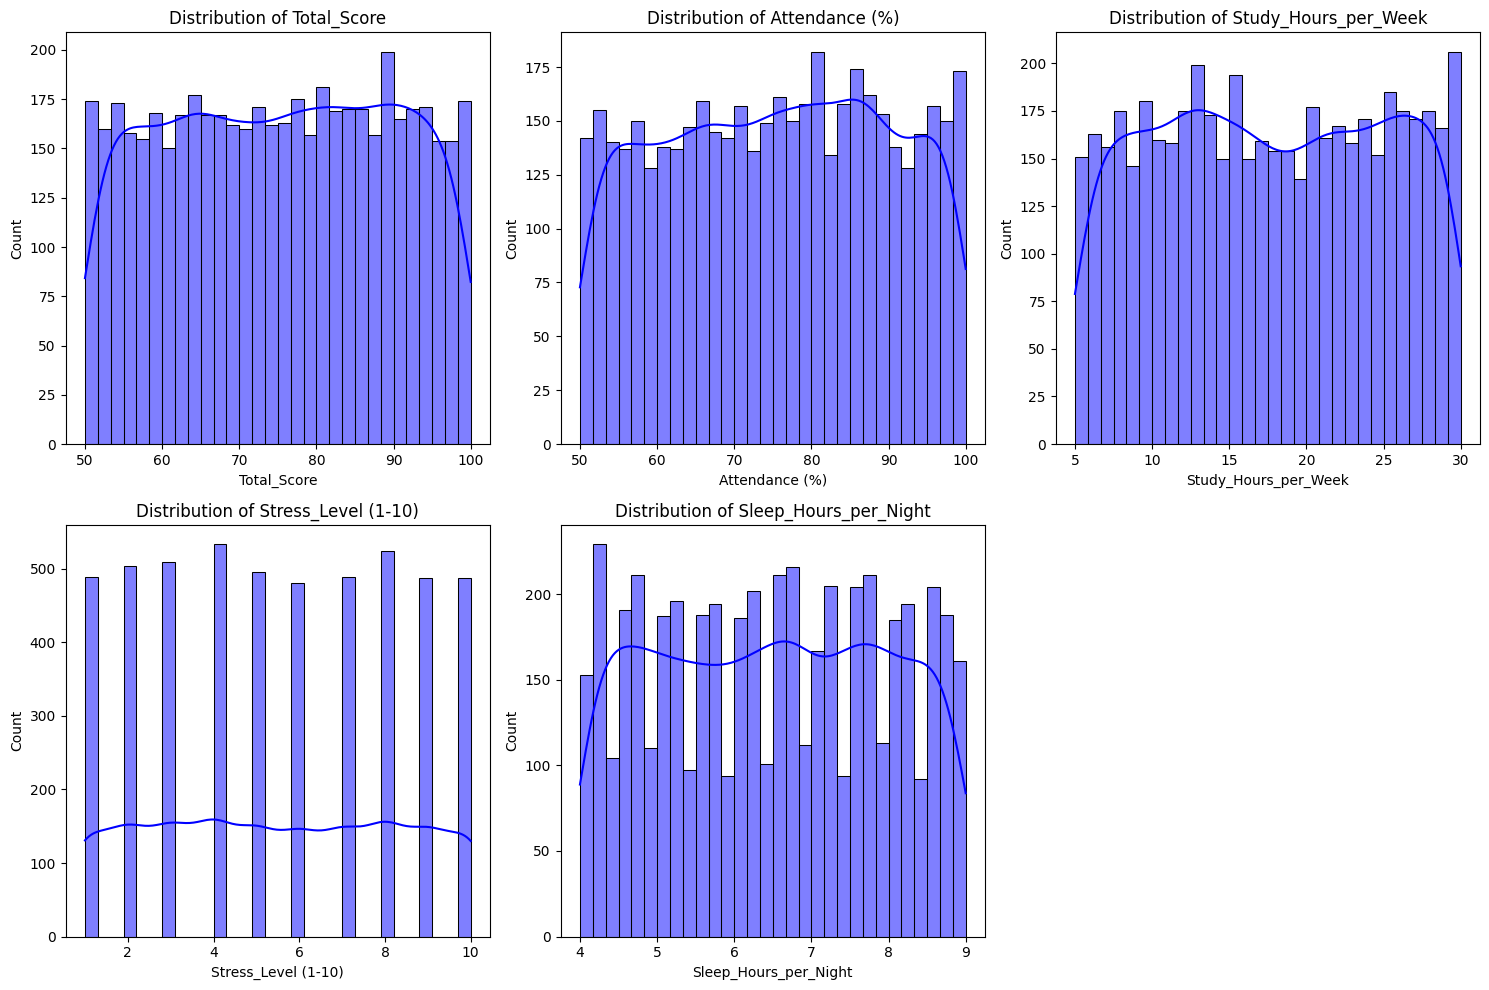

In [37]:
variables = ['Total_Score', 'Attendance (%)', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {var}")
plt.tight_layout()
plt.show()

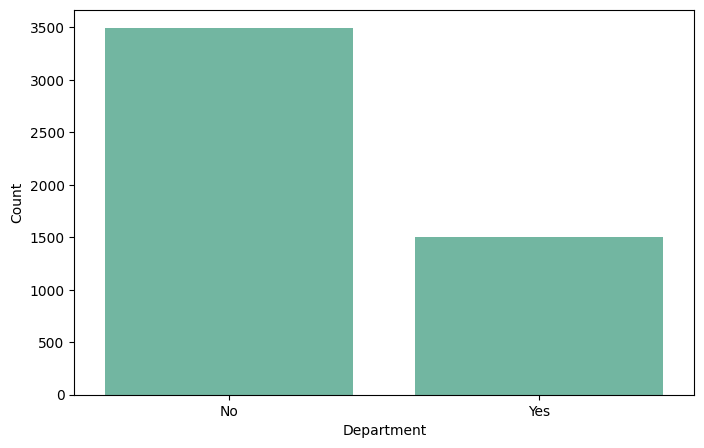

In [69]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Extracurricular_Activities', data=df)
# plt.title('')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Total_Score', ylabel='Count'>

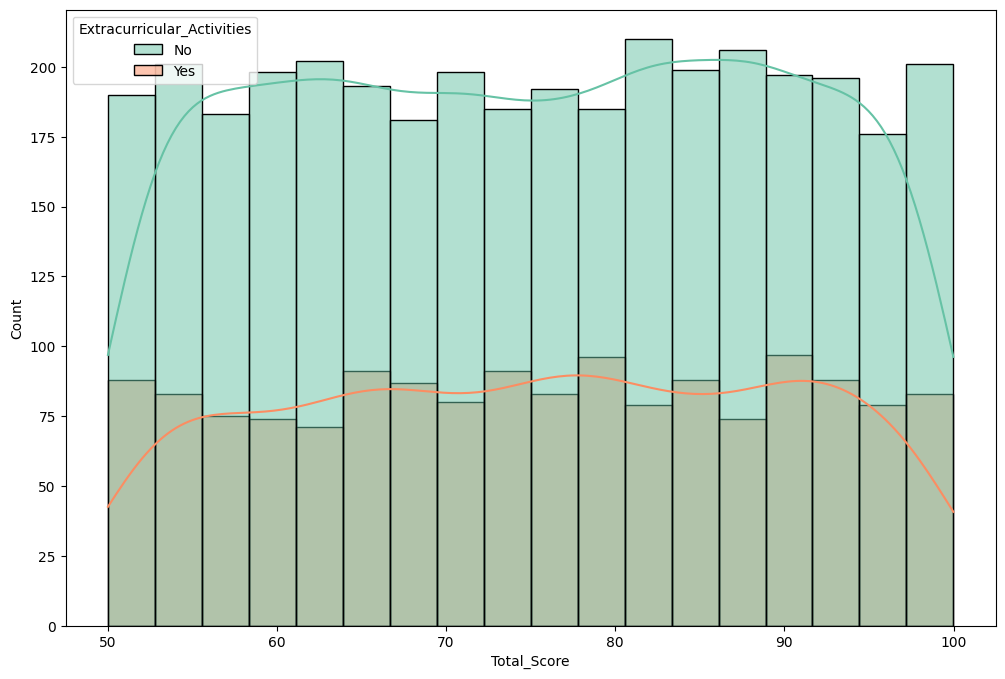

In [72]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Total_Score', hue='Extracurricular_Activities', kde=True, alpha=0.5)


####  The plot shows that students who participated in extracurricular activities tended to have higher scores. 
#### This could be because students who are involved in extracurricular activities are more likely to be well-rounded and have good time management skills.

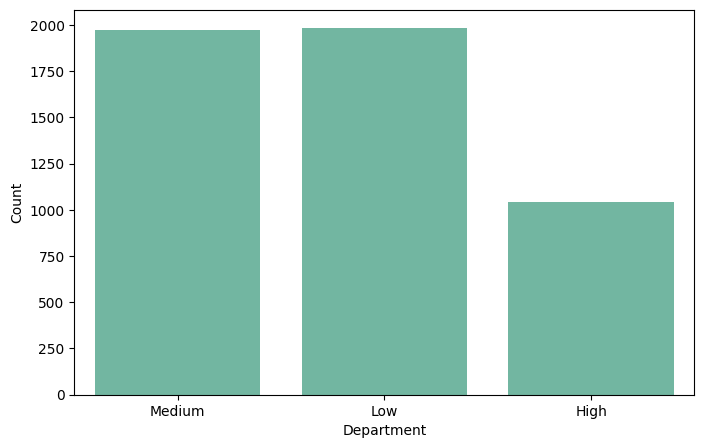

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Family_Income_Level', data=df)
# plt.title('')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Total_Score', ylabel='Count'>

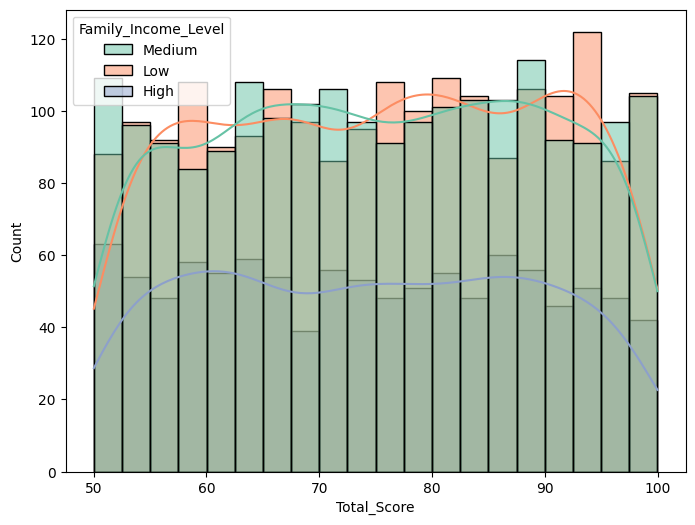

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total_Score', hue='Family_Income_Level', kde=True, bins=20, alpha=0.5)


#### The plot shows that students from high-income families tend to have higher scores.
#### This could be because students from high-income families have access to better resources and opportunities.

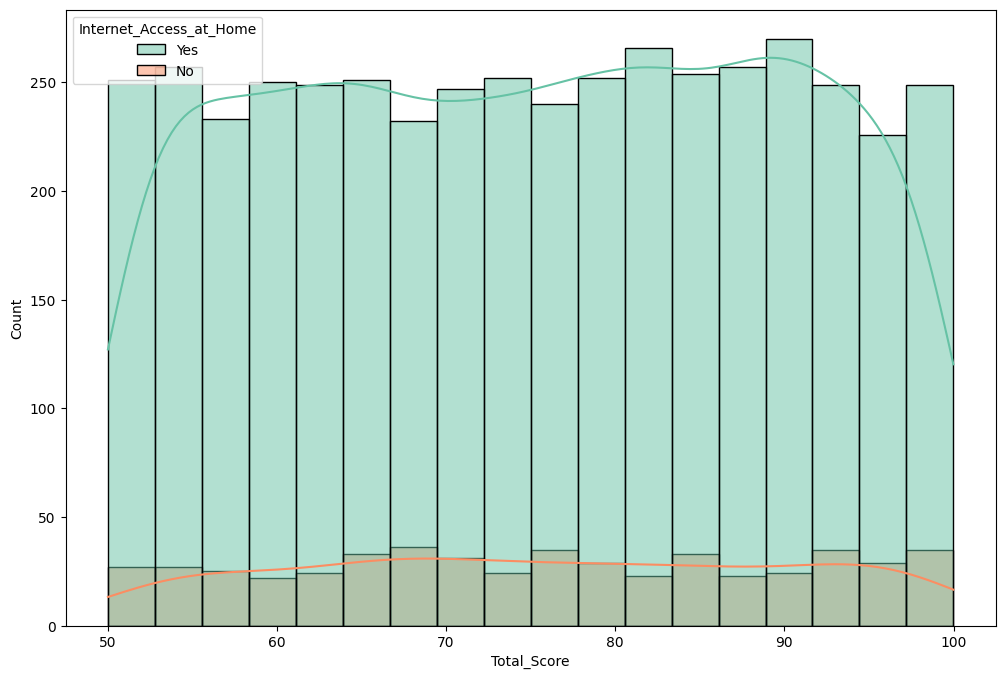

In [74]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Total_Score', hue='Internet_Access_at_Home', kde=True, alpha=0.5)
plt.show()

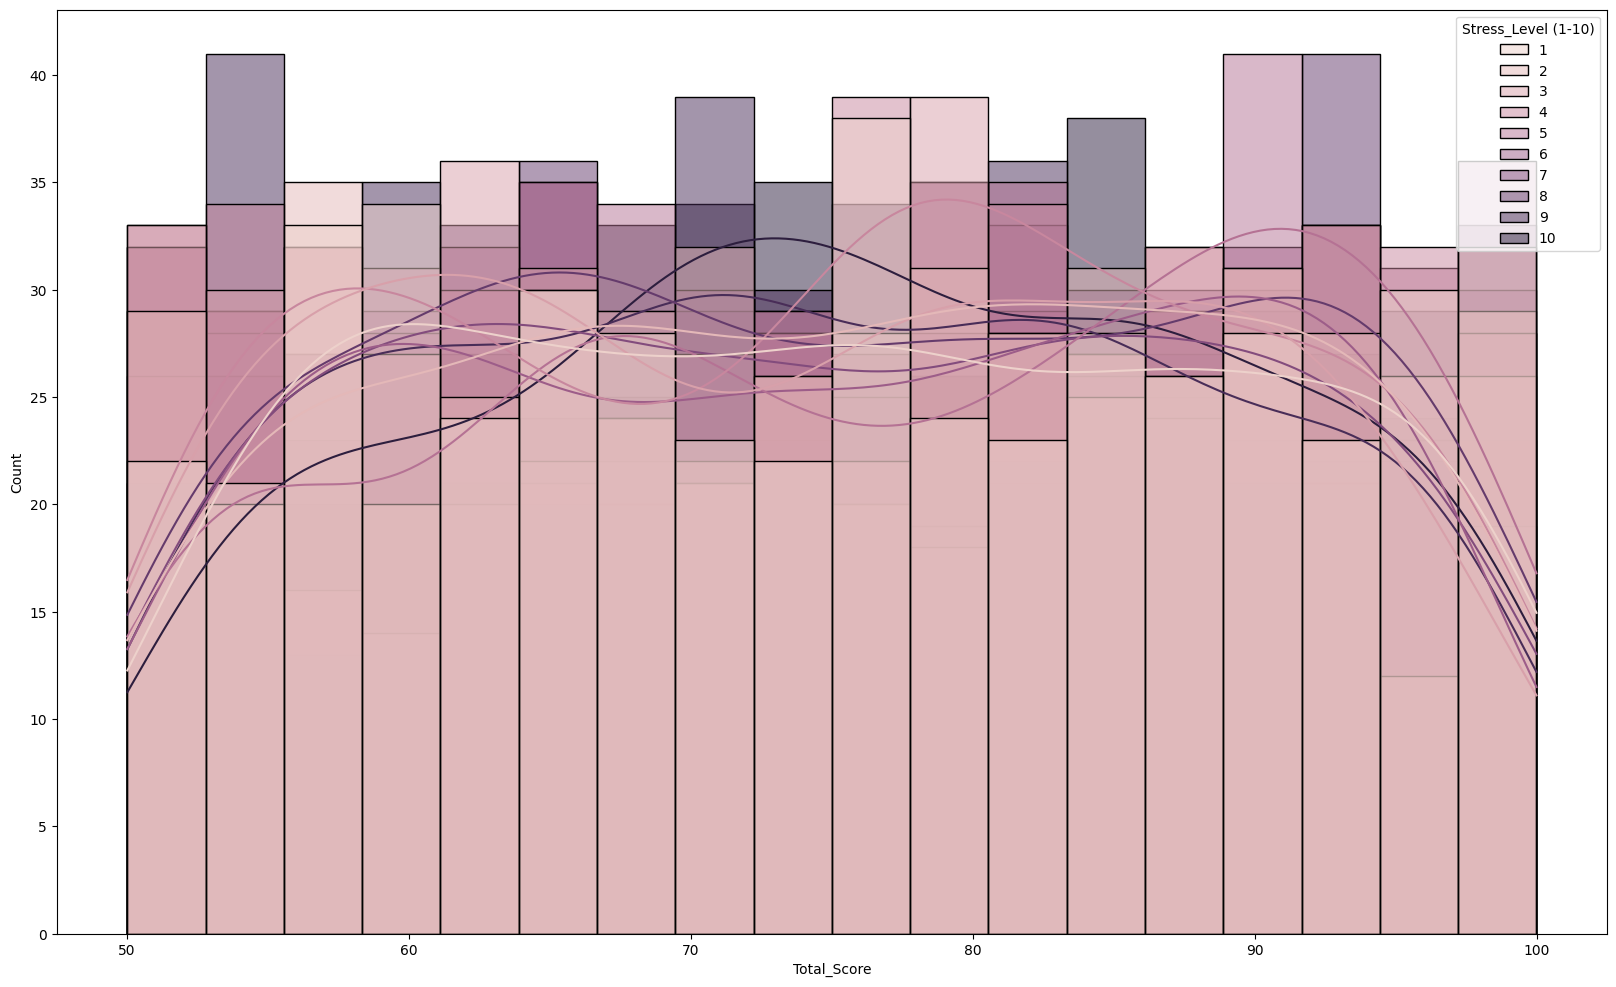

In [79]:
plt.figure(figsize=(20, 12))
sns.histplot(data=df, x='Total_Score', hue='Stress_Level (1-10)', kde=True, alpha=0.5)
plt.show()

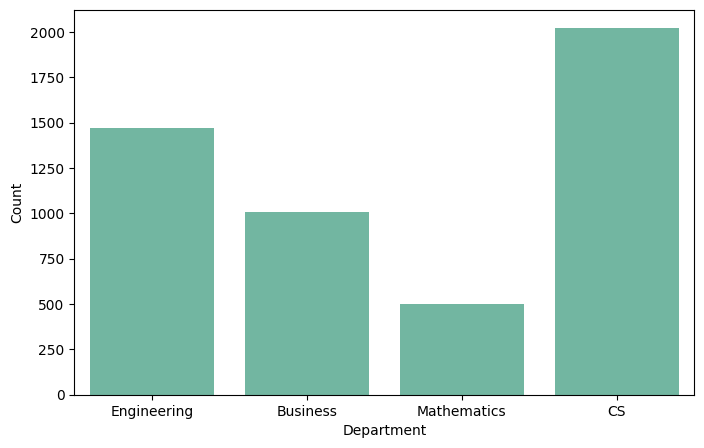

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', data=df)
# plt.title('')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

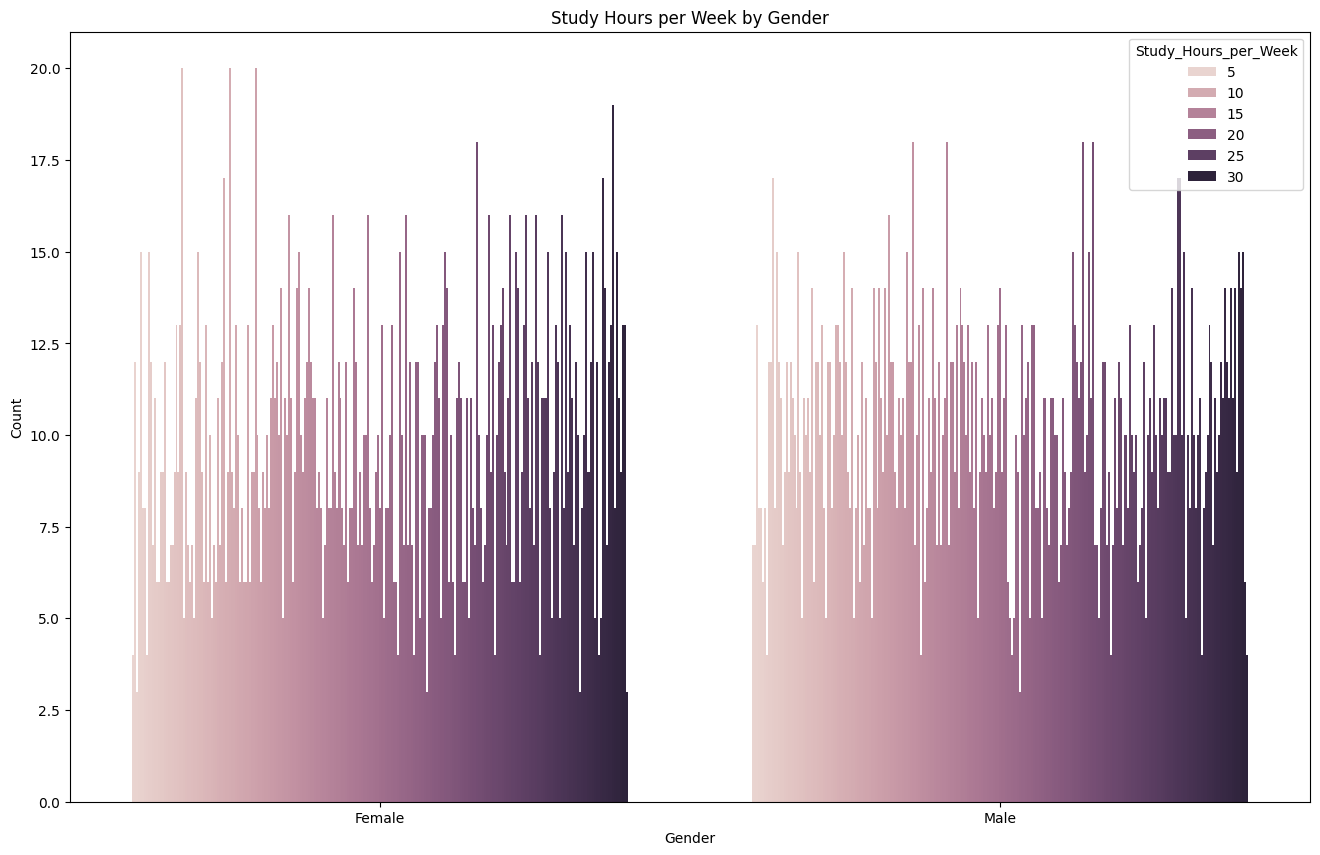

In [41]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Gender', hue='Study_Hours_per_Week', data=df)
plt.title('Study Hours per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### The plot shows that female students tend to study more hours per week than male students. 
#### This could be because female students are more likely to be diligent and hardworking.

<Axes: xlabel='Study_Hours_per_Week', ylabel='Count'>

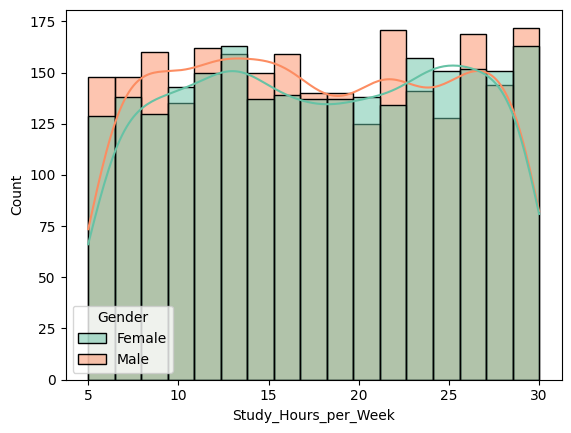

In [42]:
sns.histplot(x=df['Study_Hours_per_Week'],kde=True ,hue=df['Gender'])

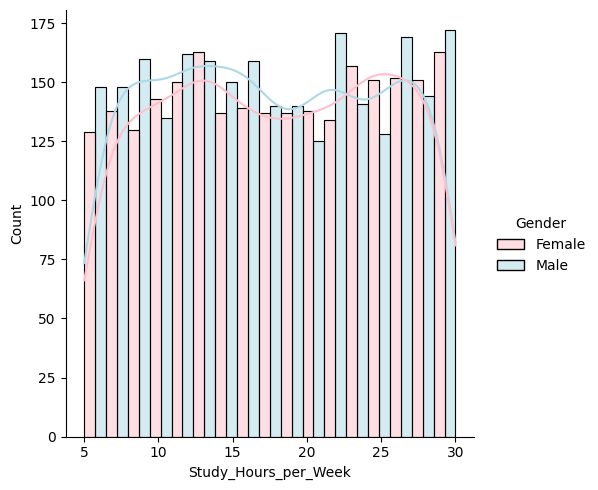

In [65]:
sns.displot(df, x="Study_Hours_per_Week", hue="Gender", multiple="dodge",kde=True, palette = ['pink','lightblue'])


#### This is another view of study hours by gender, reinforcing the earlier finding that female students study slightly more than male students on average.

In [43]:
# plt.figure(figsize=(12, 12))

# sns.scatterplot(x="Grade" ,y = 'Gender',data = df ,hue = 'Study_Hours_per_Week', size = 'Stress_Level (1-10)', palette = "deep")

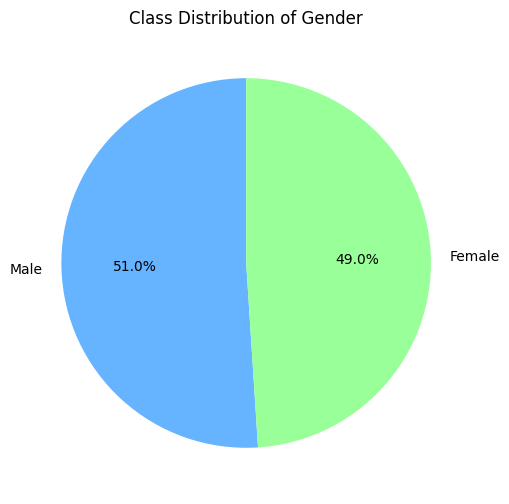

In [44]:
class_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

plt.title('Class Distribution of Gender')
plt.show()

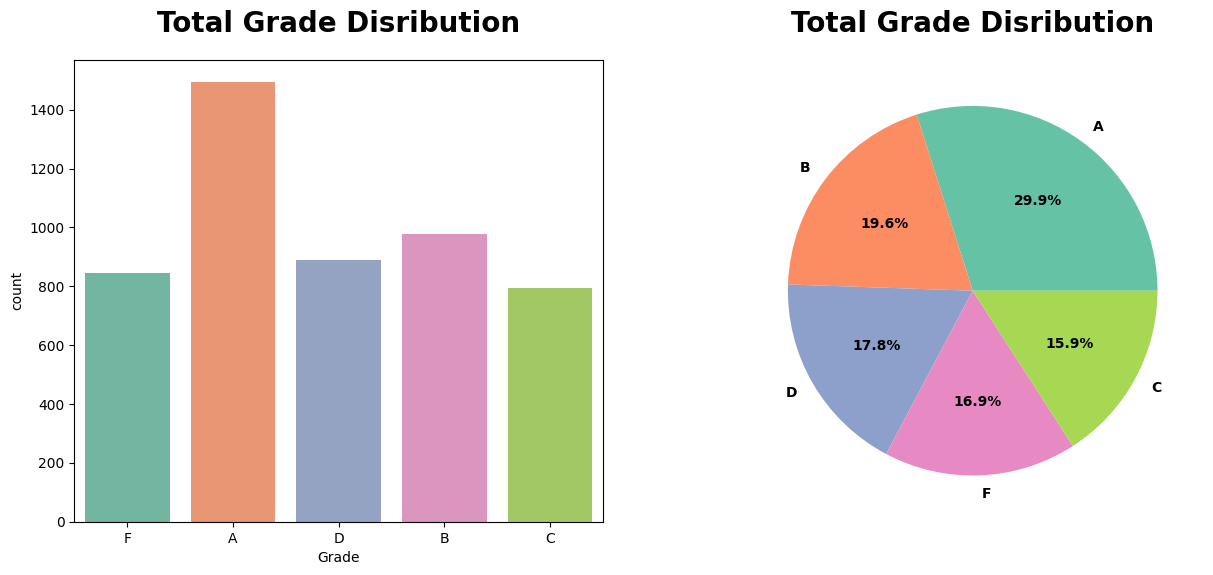

In [45]:
count = df["Grade"].value_counts()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(x ="Grade" ,data = df , hue="Grade",palette="Set2")
plt.title("Total Grade Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Total Grade Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [46]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Grade",palette="Set2")
    # for value in ax.patches:
    #     percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
    #     x = value.get_x() + value.get_width() / 2 - 0.05
    #     y = value.get_y() + value.get_height()
    #     ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Grade by {column}",fontweight="black",size=20,pad=20)
    plt.show()

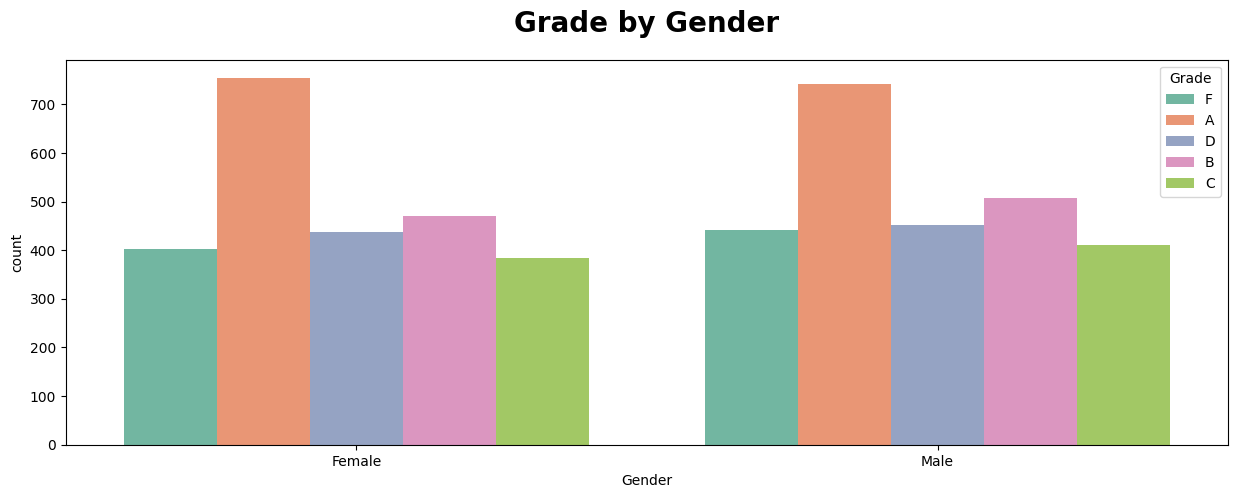

In [47]:
countplot("Gender")

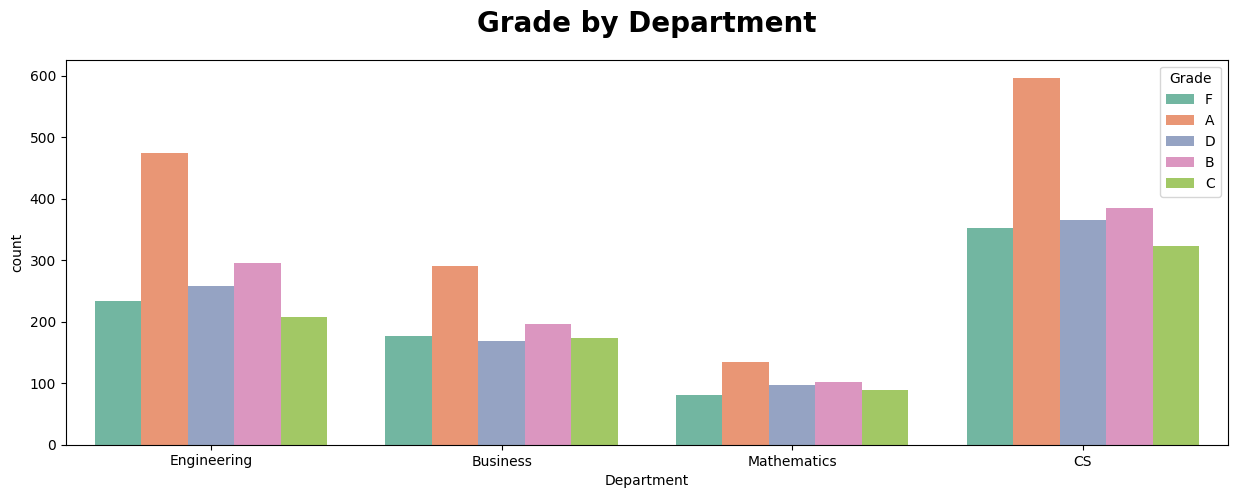

In [48]:
countplot("Department")

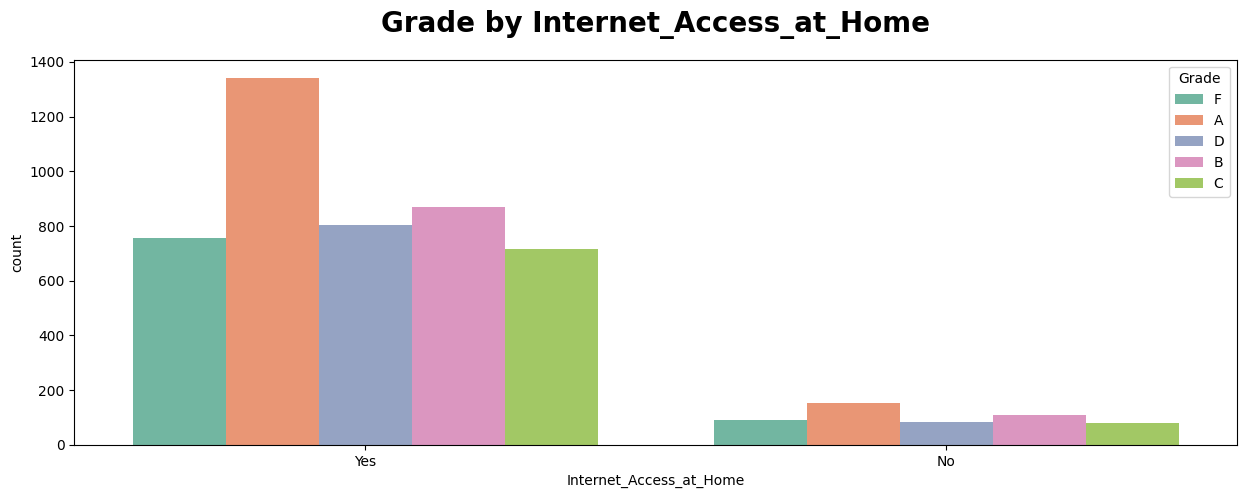

In [49]:
countplot("Internet_Access_at_Home")

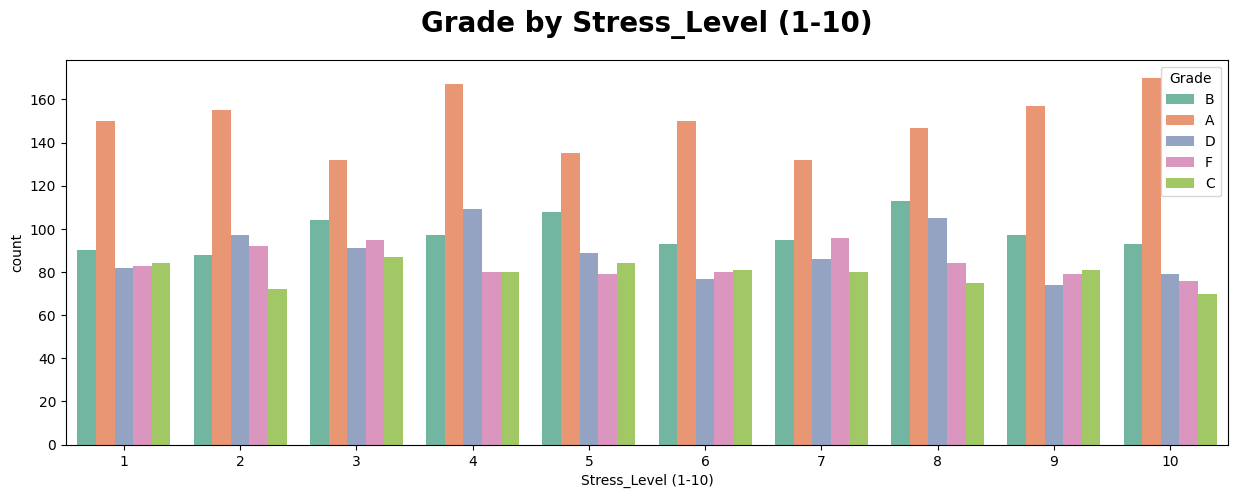

In [50]:
countplot("Stress_Level (1-10)")

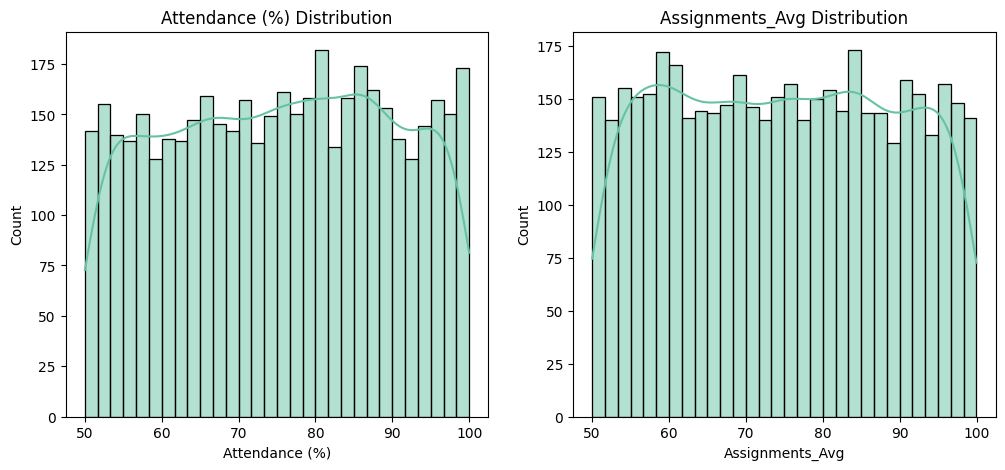

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Attendance (%)'], kde=True, bins=30)
plt.title('Attendance (%) Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Assignments_Avg'], kde=True, bins=30)
plt.title('Assignments_Avg Distribution')

plt.show()

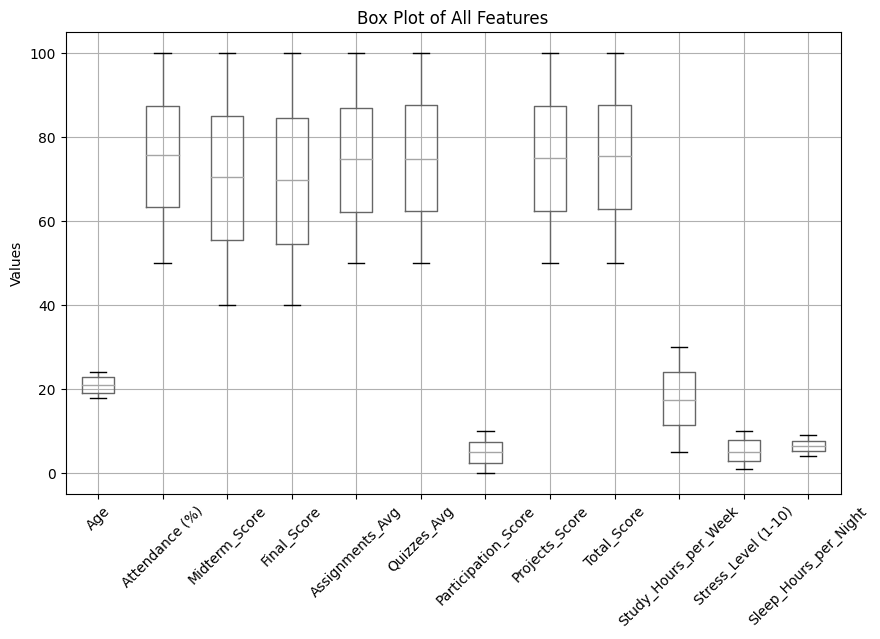

In [52]:
plt.figure(figsize=(10, 6))  
df.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

In [11]:
label_encoders = {}
for col in ['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level', 'Grade']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

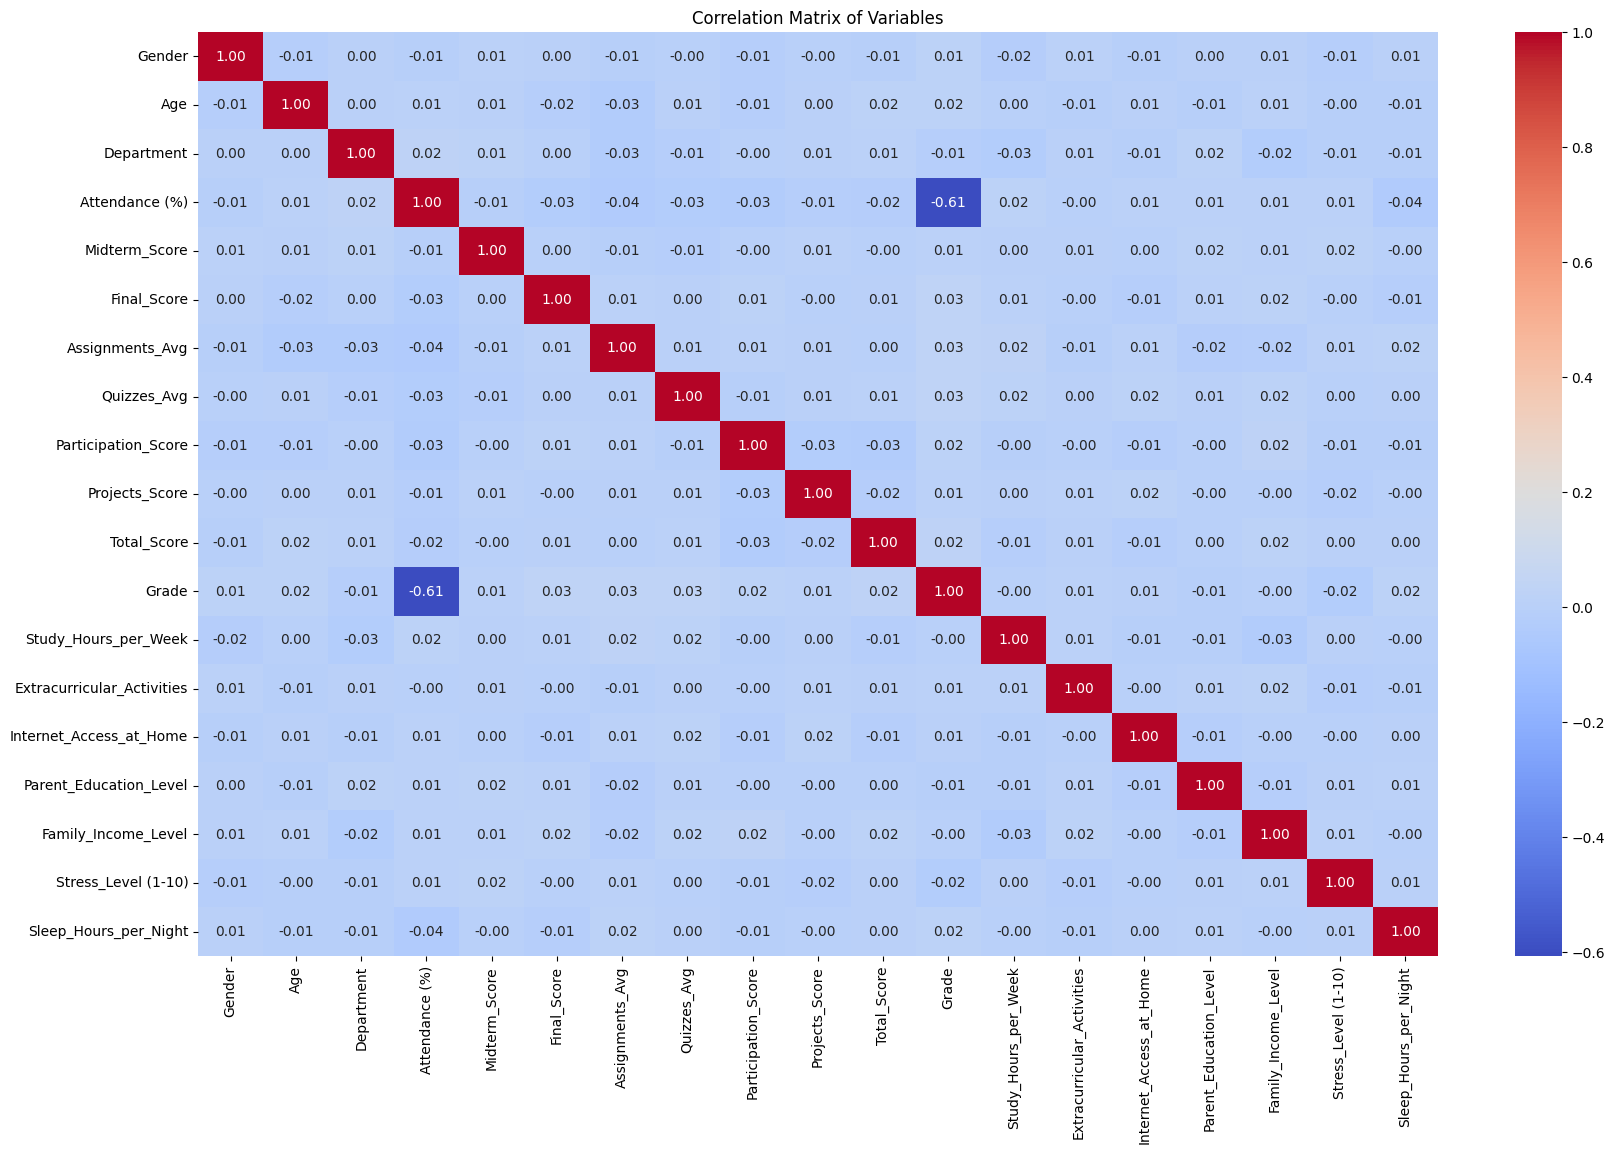

In [12]:
numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 12))
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Variables")
plt.show()

# Data Preprocessing

### Handling Categorical Variables

In [89]:
droped_feature = ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Parent_Education_Level']
df.drop(columns=droped_feature, inplace=True)

### Encoding Categorical Variables

In [90]:
labeled_feature = ['Family_Income_Level','Grade','Department']

label = LabelEncoder()

for col in labeled_feature:
    df[col] = label.fit_transform(df[col])

In [91]:
one_hot_feature = ['Gender', 'Extracurricular_Activities', 'Internet_Access_at_Home']

one_hot = OneHotEncoder()

for col in one_hot_feature:
    df[[col]] = one_hot.fit_transform(df[[col]])

### Handling Numerical Features

Handling Missing Values

In [92]:
imputer = SimpleImputer(strategy='mean')
df[['Attendance (%)', 'Assignments_Avg']] = imputer.fit_transform(df[['Attendance (%)', 'Assignments_Avg']])

### Normalization

### Oversampling